In [2]:
import uproot
import matplotlib.pyplot as plt
from particle_utils import get_charge_from_pdgc, get_name_from_pdgc

In [9]:
data = uproot.open("/home/bewilson/FASERvSi_G4/FASERvSi_baseline-build/test.root")

In [10]:
hits = [data[h] for h in data.keys()]

In [24]:
# hits[0].arrays(hits[0].keys(), library="np")


In [10]:
import glob 
import uproot
import numpy as np

event_numbers_arr = []
for fpath in glob.glob("/home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/*.root"):
    data = uproot.open(fpath)
    print(f"looking at {fpath}")
    event_numbers = data["truth"].arrays(["fEvent"], library="np")["fEvent"]

    for e in event_numbers:
        if e not in event_numbers_arr:
            event_numbers_arr.append(e)
        else:
            print(f"Found duplicate event number! Number was {e}")
            
print(event_numbers_arr)   
    

looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.5.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.8.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.7.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.4.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.1.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.3.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.0.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.9.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.6.root
looking at /home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi/FASERvSi.gfaser.part.2.root
[np.int32(19999802), np.int32(14394422), np.int32(41495541), np.int32(83440077), np.int32(41113309), np.int32(52890073), np.int32(

In [11]:
import glob 
import uproot
import numpy as np

event_numbers_arr = []

data = uproot.open("/home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi.1000.HITS.root")
event_numbers = data["truth"].arrays(["fEvent"], library="np")["fEvent"]

for e in event_numbers:
    if e not in event_numbers_arr:
        event_numbers_arr.append(e)
    else:
        print(f"Found duplicate event number! Number was {e}")
            
print(event_numbers_arr)   
    

[np.int32(88658278), np.int32(40638846), np.int32(59136295), np.int32(46153596), np.int32(44487624), np.int32(93726918), np.int32(13868672), np.int32(29378992), np.int32(30779047), np.int32(11825616), np.int32(45460769), np.int32(99059520), np.int32(64319327), np.int32(33235002), np.int32(57916717), np.int32(29271096), np.int32(33939284), np.int32(72253599), np.int32(59759617), np.int32(58556989), np.int32(91146551), np.int32(47399133), np.int32(53350040), np.int32(48030958), np.int32(27873153), np.int32(36122381), np.int32(79374609), np.int32(94600812), np.int32(89025382), np.int32(45793084), np.int32(81540847), np.int32(27162577), np.int32(10718612), np.int32(94966248), np.int32(74521653), np.int32(91374858), np.int32(24829414), np.int32(98947162), np.int32(51512793), np.int32(85994475), np.int32(34142166), np.int32(84968739), np.int32(49632977), np.int32(99408875), np.int32(61996987), np.int32(64100006), np.int32(84729053), np.int32(33929450), np.int32(44577100), np.int32(77991472),

In [7]:
n_leptons_arr = []
for event in uproot.iterate("/home/bewilson/FASERvSi_G4/GenieOutput/FASERvSi.gfaser.root", step_size=1):
    
    n_leptons = 0
    lep_pgdc = []
    lep_e = []
    lep_mother = []
    
    for i, (pdgc, status) in enumerate(zip(event["pdgc"][0], event["status"][0])):
        if abs(pdgc) in [11, 14, 16] and status == 1:
            n_leptons += 1
            lep_pgdc.append(pdgc)
            lep_e.append(event["E"][0][i])
            lep_mother.append(event["pdgc"][0][event["firstMother"][0][i]])
            
            
    if n_leptons > 1:
        print("\nFound event > 1 charged leptons - they were:")
        for p, e, m in zip(lep_pgdc, lep_e, lep_mother):
            print(f"pdgc = {get_name_from_pdgc(p):<8} Energy = {e:<8.2} Mother pdgc = {get_name_from_pdgc(m):<8}")
        
    n_leptons_arr.append(n_leptons)
    # break



Found event > 1 charged leptons - they were:
pdgc = e+       Energy = 0.087    Mother pdgc = eta     
pdgc = e-       Energy = 0.56     Mother pdgc = eta     


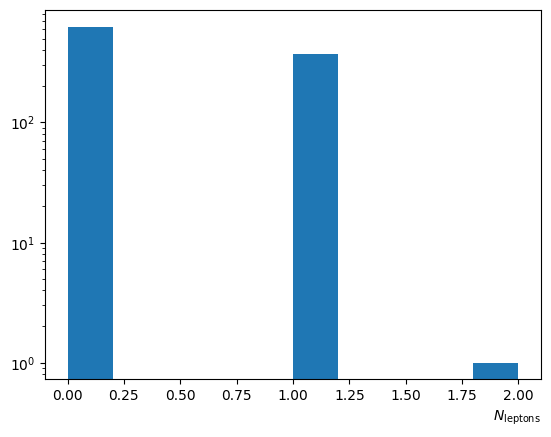

In [33]:
fig, ax = plt.subplots()
ax.hist(n_leptons_arr)
ax.set_xlabel(r"$N_{\text{leptons}}$", loc='right');
ax.set_yscale("log")